# Gathering Data:

In [1]:
# import needed modules
import pandas as pd
import numpy as np
import requests
import os
import json
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# read twitter-archive-enhanced.csv as a df
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# download the image_predictions.tsv to the current working directory
url=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
filename=url.split('/')[-1]
if not os.path.isfile(filename):
    with open(filename,'wb') as file:
        file.write(response.content)

In [4]:
# read the tsv file downloaded above in a df
image_predictions=pd.read_csv(filename,sep='\t')

In [5]:
# get additional data from twitter API and saving them to a file named tweet_json.txt
if not os.path.isfile('tweet_json.txt'):
    from timeit import default_timer as timer
    import tweepy
    from tweepy import OAuthHandler
    

# query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# these are hidden to comply with Twitter's API terms and conditions
    consumer_key = 'HIDDEN'
    consumer_secret = 'HIDDEN'
    access_token = 'HIDDEN'
    access_secret = 'HIDDEN'

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    api = tweepy.API(auth, wait_on_rate_limit=True)

# tweet IDs for which to gather additional data via Twitter's API
    tweet_ids = twitter_archive.tweet_id.values
    len(tweet_ids)
# query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
# save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'wb') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [6]:
# read from the json file
# make a temporary list of dictionaries that will have the three keys we want id, retweet_count and favourite_count
temp_list=[]
with open('tweet_json.txt','r') as f:
    for l in f:
        tweet=json.loads(l)
        retweet_count=tweet['retweet_count']
        tweet_id=tweet['id']
        fav_count=tweet['favorite_count']
        temp_list.append({'retweet_count':retweet_count,'tweet_id':tweet_id,'favorite_count':fav_count})
        #named "id" as "tweet_id" to be consistent with the twitter_archive df
        
# create a df from temp_list
api_df=pd.DataFrame(temp_list)

# Assessing Data

In [7]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [11]:
twitter_archive.query('name=="a"').shape

(55, 17)

In [12]:
twitter_archive.query('rating_numerator<10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
twitter_archive.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [14]:
twitter_archive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [15]:
twitter_archive.query('rating_denominator>10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [16]:
twitter_archive.duplicated().sum()

0

In [17]:
twitter_archive.expanded_urls.isnull().sum()

59

In [18]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [21]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
image_predictions.duplicated().sum()

0

In [23]:
api_df

,retweet_count,tweet_id,favorite_count
0,8853,892420643555336193,39467
1,6514,892177421306343426,33819
2,4328,891815181378084864,25461
3,8964,891689557279858688,42908
4,9774,891327558926688256,41048
...,...,...,...
2349,41,666049248165822465,111
2350,147,666044226329800704,311
2351,47,666033412701032449,128
2352,48,666029285002620928,132


In [24]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   retweet_count   2354 non-null   int64
 1   tweet_id        2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [25]:
api_df.describe()

,retweet_count,tweet_id,favorite_count
count,2354.000000,2.354000e+03,2354.000000
mean,3164.797366,7.426978e+17,8080.968564
std,5284.770364,6.852812e+16,11814.771334
min,0.000000,6.660209e+17,0.000000
25%,624.500000,6.783975e+17,1415.000000
50%,1473.500000,7.194596e+17,3603.500000
75%,3652.000000,7.993058e+17,10122.250000
max,79515.000000,8.924206e+17,132810.000000


### Quality issues:

1-so many missing values in these 5 columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp.

2-timestamp is string not datetime object.

3-"None" instead of Nan in dog breeds columns and name column.

4-rating numerator values aren't correctly extracted as they're integers in the rating_numerator column.

5-"rating_numerator" has a minimum value of 0.

6-"rating_numerator" has a maximum value of 1776 and 'ratings_denominator" has a maximum value of 170.

7-the denomenator is inconsistent (isn't always 10).

8- 55 dogs names as "a".

9-the source column mostly has the same value for all entries.

10-project requirement: some tweets don't have images in the image_predictions dataframe.


### Tidiness issues:

1-"doggo", "floffer", "puppo" "pupper" are in 4 columns instead of 1 (values are column names).

2-the image_predictions dataframe should be reshaped because values are column names.

3-twitter_api dataframes should be merged to the twitter_archive df as it's not an observational unit.

# Cleaning Data:

In [26]:
#making copies of all three dataframes before cleaning
clean_tw_arch=twitter_archive.copy()
clean_img_pred=image_predictions.copy()

### quality:

##### define: 
*many missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns.
the solution is to drop these columns since they are irrelevant.

##### code:

In [27]:
clean_tw_arch.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

##### test:

In [28]:
clean_tw_arch.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

##### define:
timestamp is string instead of datetime object.
I will convert it using pandas to_datetime 

##### code:

In [29]:
clean_tw_arch.timestamp=pd.to_datetime(clean_tw_arch.timestamp)

##### test:

In [30]:
clean_tw_arch.timestamp.dtype
# https://stackoverflow.com/questions/29206612/difference-between-data-type-datetime64ns-and-m8ns

datetime64[ns, UTC]

##### define:
"None" instead of Nan in dog breeds columns and name column can be replaced using method "replace"

In [31]:
dog_none=clean_tw_arch.loc[:-1,'name':]
for col in dog_none.columns:
    clean_tw_arch[col].replace('None',np.nan,inplace=True)

##### test:

In [32]:
clean_tw_arch.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1072,739979191639244800,2016-06-07 00:36:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Nollie. She's waving at you. If you do...,https://twitter.com/dog_rates/status/739979191...,12,10,Nollie,NaN,NaN,NaN,NaN
2132,670079681849372674,2015-11-27 03:20:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fabio. He's a wonderful pup. Can't stay a...,https://twitter.com/dog_rates/status/670079681...,10,10,Fabio,NaN,NaN,NaN,NaN
895,759159934323924993,2016-07-29 22:53:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: AT DAWN...\nWE RIDE\n\n11/10 ht...,https://twitter.com/dog_rates/status/670319130...,11,10,NaN,NaN,NaN,NaN,NaN
472,816450570814898180,2017-01-04 01:05:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Moose. He doesn't want his friend to go b...,https://twitter.com/dog_rates/status/816450570...,13,10,Moose,NaN,NaN,NaN,NaN
22,887517139158093824,2017-07-19 03:39:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,NaN,NaN,NaN,NaN
588,799422933579902976,2016-11-18 01:24:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Longfellow (prolly sophisticated). He'...,https://twitter.com/dog_rates/status/799422933...,12,10,Longfellow,NaN,NaN,NaN,NaN
2144,669942763794931712,2015-11-26 18:16:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Andru. He made his very own lacrosse s...,https://twitter.com/dog_rates/status/669942763...,11,10,Andru,NaN,NaN,NaN,NaN
173,858471635011153920,2017-04-30 00:02:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just arrived. Used paworit...,https://twitter.com/dog_rates/status/858471635...,13,10,Sophie,NaN,NaN,NaN,NaN
1855,675531475945709568,2015-12-12 04:23:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie AKA Queen Slayer of the Orbs. Ve...,https://twitter.com/dog_rates/status/675531475...,10,10,Ellie,NaN,NaN,NaN,NaN
1535,689977555533848577,2016-01-21 01:07:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a pup wearing a beret. ...,https://twitter.com/dog_rates/status/689977555...,12,10,NaN,NaN,NaN,NaN,NaN


##### define:
the source column has almost the same value for all entries and since we already know the source, the sensible solution is to drop this column.

##### code:

In [33]:
clean_tw_arch.drop(columns='source',inplace=True)

##### test:

In [34]:
clean_tw_arch.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

##### define:
in the poject requiremnets it's stated that we want only tweets with images, so I will drop any tweet without an image using query.
then I will merge the jpg_url from the clean_img_pred df to clean_tw_arch df,then will drop any tweet that has no image.

##### code:

In [35]:
clean_tw_arch=pd.merge(clean_tw_arch,clean_img_pred[['tweet_id','jpg_url']],on='tweet_id',how='left')
clean_tw_arch= clean_tw_arch.query('jpg_url == jpg_url')
# source: https://stackoverflow.com/questions/32207264/pandas-query-none-values

##### test:

In [36]:
clean_tw_arch.jpg_url.isnull().sum()

0

##### define:
55 dogs names are "a", since these data is unimportant and can't be retrieved from text without errors, I choosed to replace all these dog names with NaN.

##### code:

In [37]:
clean_tw_arch.name.replace('a',np.nan,inplace=True)

##### test

In [38]:
clean_tw_arch.query('name=="a"')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url


##### define:
some rating_numerator values are less than 10, this means these people didn't use the weratedogs default rating system so the apropriate solution is to add 10 to all of these values.
this will make all ratings less than 10 consistent with the rest of the ratings.
the issues with these inconsistent ratings numerators and denomenators gives me no other choice but to extract it again from text using regex. 

##### code:

In [39]:
clean_tw_arch.rating_numerator=clean_tw_arch.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}',expand=False).astype(float)

##### test:

In [40]:
clean_tw_arch.rating_numerator.sort_values()

1016       0.0
315        0.0
2091       1.0
2335       1.0
1869       1.0
         ...  
1779     144.0
902      165.0
1120     204.0
2074     420.0
979     1776.0
Name: rating_numerator, Length: 2075, dtype: float64

### This obviously didn't solve the problem, so I have to investigate more..

In [41]:
clean_tw_arch.query('rating_numerator>20').shape

(16, 12)

So, 20 values need cleaning to make data consistent, let's have a closer look at these ratings.

In [42]:
clean_tw_arch.query('rating_numerator>20')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url
433,820690176645140481,2017-01-15 17:52:40+00:00,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84.0,70,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg
516,810984652412424192,2016-12-19 23:06:23+00:00,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7,Sam,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg
902,758467244762497024,2016-07-28 01:00:57+00:00,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165.0,150,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/ext_tw_video_thumb/75846...
979,749981277374128128,2016-07-04 15:00:45+00:00,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
1120,731156023742988288,2016-05-13 16:15:54+00:00,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204.0,170,this,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg
1202,716439118184652801,2016-04-03 01:36:11+00:00,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50.0,50,Bluebert,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg
1228,713900603437621249,2016-03-27 01:29:02+00:00,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99.0,90,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg
1254,710658690886586372,2016-03-18 02:46:49+00:00,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80.0,80,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg
1274,709198395643068416,2016-03-14 02:04:08+00:00,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45.0,50,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg
1351,704054845121142784,2016-02-28 21:25:30+00:00,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60.0,50,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg


the dog Sam rating isn't correctly extracted so I have to change it, yet after looking closer, the dog sam doesn't have a rating so I choose to drop its row from the dataframe.
also I noticed that entry which has a rating of 420/10 isn't a dog, so I choose to drop this row aswell.
additionally the rating for atticus might be problematic as an outlier.

In [43]:
clean_tw_arch.drop([516,2074,979],inplace=True)

I noticed that when the denominator is greater than 10, this means this rating is for a group of dogs, so I choosed to subtract the denominator from the numerator, then divide by the denominator divided by 10, and then add 10, this will give us the mean rating for every dog in the group.

In [44]:
incon_ratings=clean_tw_arch.query('rating_numerator>20').copy()

In [45]:
incon_ratings.rating_numerator=(incon_ratings.rating_numerator-incon_ratings.rating_denominator)/(incon_ratings.rating_denominator/10)+10

In [46]:
incon_ratings

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url
433,820690176645140481,2017-01-15 17:52:40+00:00,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,12.0,70,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg
902,758467244762497024,2016-07-28 01:00:57+00:00,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,11.0,150,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/ext_tw_video_thumb/75846...
1120,731156023742988288,2016-05-13 16:15:54+00:00,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,12.0,170,this,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg
1202,716439118184652801,2016-04-03 01:36:11+00:00,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,10.0,50,Bluebert,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg
1228,713900603437621249,2016-03-27 01:29:02+00:00,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,11.0,90,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg
1254,710658690886586372,2016-03-18 02:46:49+00:00,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,10.0,80,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg
1274,709198395643068416,2016-03-14 02:04:08+00:00,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,9.0,50,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg
1351,704054845121142784,2016-02-28 21:25:30+00:00,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,12.0,50,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg
1433,697463031882764288,2016-02-10 16:51:59+00:00,Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,11.0,40,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg
1634,684225744407494656,2016-01-05 04:11:44+00:00,"Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,11.0,130,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg


now I will drop these rows from the clean_tw_arch df and then add the corrected df (incon_ratings)

In [47]:
clean_tw_arch=clean_tw_arch.query('rating_numerator<=20')

In [48]:
clean_tw_arch=clean_tw_arch.append(incon_ratings,sort=False)

now there's no need for the denominator column as all of its values are supposed to be 10. so I will drop it.

In [49]:
clean_tw_arch.drop(columns='rating_denominator',inplace=True)

In [50]:
clean_tw_arch.query('rating_numerator<5')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,jpg_url
315,835152434251116546,2017-02-24 15:40:31+00:00,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0.0,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg
765,777885040357281792,2016-09-19 15:00:20+00:00,This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3.0,Wesley,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg
883,760252756032651264,2016-08-01 23:15:56+00:00,This is Fido. He can tell the weather. Not goo...,https://twitter.com/dog_rates/status/760252756...,4.0,Fido,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/Coz12OLWgAADdys.jpg
912,757596066325864448,2016-07-25 15:19:12+00:00,Here's another picture without a dog in it. Id...,https://twitter.com/dog_rates/status/757596066...,4.0,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg
1004,747816857231626240,2016-06-28 15:40:07+00:00,Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4.0,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg
1016,746906459439529985,2016-06-26 03:22:31+00:00,"PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...,0.0,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg
1165,722974582966214656,2016-04-21 02:25:47+00:00,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4.0,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg
1189,718246886998687744,2016-04-08 01:19:36+00:00,This is Alexanderson. He's got a weird ass bir...,https://twitter.com/dog_rates/status/718246886...,3.0,Alexanderson,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/Cfe5tLWXEAIaoFO.jpg
1219,714631576617938945,2016-03-29 01:53:39+00:00,This is Benedict. He's a feisty pup. Needs a b...,https://twitter.com/dog_rates/status/714631576...,4.0,Benedict,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CerhoBWWAAA5eLL.jpg
1249,711306686208872448,2016-03-19 21:41:44+00:00,What hooligan sent in pictures w/out a dog in ...,https://twitter.com/dog_rates/status/711306686...,3.0,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/Cd8Rpl0W0AAN1kU.jpg


Wow, some people actually don't like their dogs, this is strange.

##### test:

In [51]:
clean_tw_arch.query("rating_numerator>20")

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,jpg_url


### tidiness:

##### define:
"doggo", "floffer", "puppo" "pupper" are in 4 columns instead of 1. this can be solved using the melt function.

##### code:

In [52]:
clean_tw_arch=pd.melt(clean_tw_arch,id_vars=['tweet_id', 'timestamp','text', 'expanded_urls',
       'rating_numerator','name','jpg_url'],value_name='breed').drop(columns='variable',axis=1)

##### test:

In [53]:
clean_tw_arch.breed.value_counts()

pupper     222
doggo       80
puppo       24
floofer      8
Name: breed, dtype: int64

##### define:
in image_predictions df (p1,p2,p3) , (p1_conf,p2_conf_p3_conf) and (p1_dog,p2_dog,p3_dog) should be reshaped using wide_to_long function.

source: https://nfpdiscussions.udacity.com/t/weratedogs-project-wide-to-long-reshaping/33037/4

##### code:

In [54]:
# Rename the dataset columns
clean_img_pred.columns = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
# Reshape the dataframe
clean_img_pred = pd.wide_to_long(clean_img_pred, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

##### test:

In [55]:
clean_img_pred.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


##### define:
the twitter_archive and twitter_api dataframes should be merged using merge function.

##### code:

In [56]:
master_df=pd.merge(clean_tw_arch,api_df,on=['tweet_id'],how='left')

##### test:

In [57]:
master_df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,jpg_url,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,NaN,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,NaN,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,NaN,9774.0,41048.0


# Storing Data:

In [58]:
master_df.to_csv("twitter_archive_master.csv",index=False)
clean_img_pred.to_csv('clean_image_pred.csv',index=False)

# Visualizing & Analyzing Data:

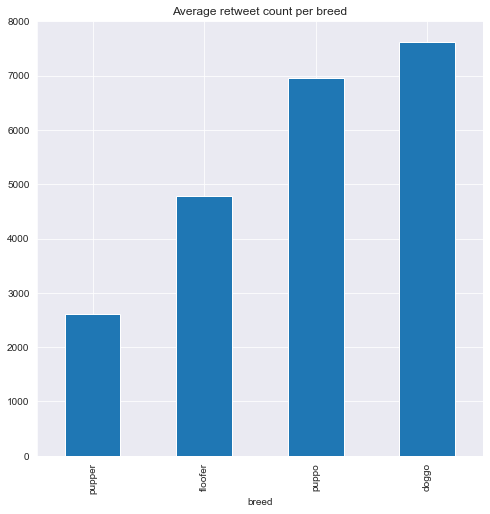

In [59]:
master_df.groupby('breed').retweet_count.mean().sort_values().plot(kind='bar',title='Average retweet count per breed',figsize=(8,8));

This bar plot shows us that doggo breed has the most retweet count per average.

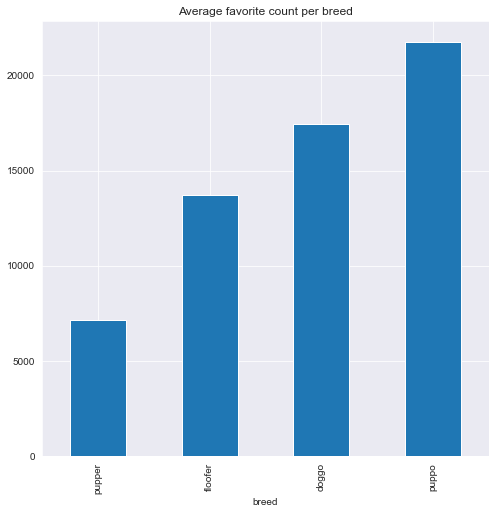

In [60]:
master_df.groupby('breed').favorite_count.mean().sort_values().plot(kind='bar',title='Average favorite count per breed',figsize=(8,8));

This bar plot shows that "puppo" breed has the most favorite count per average which can indicate that twitter users prefer this breed more than other breeds.
we can also observe that average retweet count is far lower than the average favorite count which indicates that most people choose to favorite a tweet rather than retweet it.

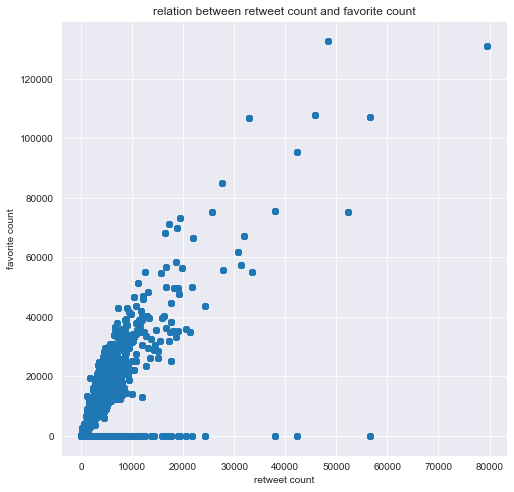

In [61]:
plt.figure(figsize=(8,8))
plt.scatter(master_df['retweet_count'],master_df['favorite_count'])
plt.xlabel('retweet count')
plt.ylabel('favorite count')
plt.title('relation between retweet count and favorite count');

This plot shows a very strong relationship between retweet count and favourite count.

In [62]:
master_df.describe()

,tweet_id,rating_numerator,retweet_count,favorite_count
count,8.288000e+03,8288.000000,8280.000000,8280.00000
mean,7.384434e+17,10.598832,2976.174879,8559.70628
std,6.785343e+16,2.180411,5057.472202,12104.89240
min,6.660209e+17,0.000000,16.000000,0.00000
25%,6.764899e+17,10.000000,634.000000,1672.00000
50%,7.119835e+17,11.000000,1406.000000,3859.00000
75%,7.931997e+17,12.000000,3443.000000,10943.00000
max,8.924206e+17,15.000000,79515.000000,132810.00000


In [63]:
master_df.rating_numerator.describe()

count    8288.000000
mean       10.598832
std         2.180411
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        15.000000
Name: rating_numerator, dtype: float64

This shows interestingly that most rating numerators are close to 10.
surprisingly, no numerators exceeded 15.
additionally it shows that sometime people don't like their dogs because the minimum numerator is 0.

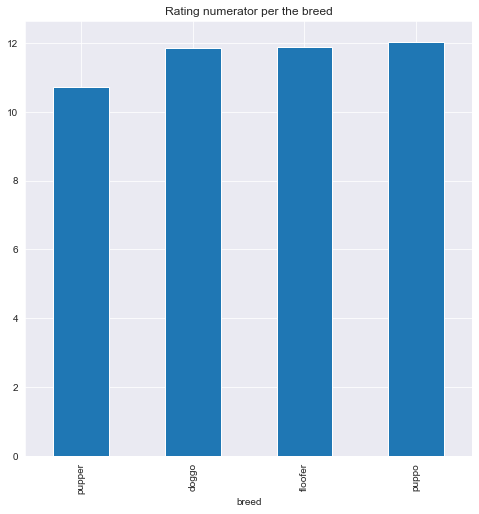

In [64]:
master_df.groupby('breed').rating_numerator.mean().sort_values().plot(kind='bar',title="Rating numerator per the breed",figsize=(8,8));

This bar plot shows that puppo foofer, doggo have very similar rating numerator per average. while pupper has the lowest rating